# Spam Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
ds = ds.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [8]:
ds

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
ds = ds.rename(columns={'v1':'type', 'v2':'text'})

In [10]:
ds['type']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: object

In [11]:
ds['type'].map({'ham':0,'spam':1})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5572, dtype: int64

In [12]:
ds['type'] = ds['type'].map({'ham':0,'spam':1})

In [13]:
ds

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
ds.duplicated().sum()

403

In [15]:
ds = ds.drop_duplicates(keep='first')

In [16]:
ds['text'].duplicated().sum()

0

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [18]:
ds.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
ds['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

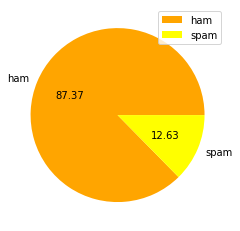

In [20]:
plt.pie(ds['type'].value_counts(), labels=['ham','spam'], colors=['orange','yellow'], autopct="%0.2f")
plt.legend();

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\SHREYASH
[nltk_data]     SALUNKE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
ds['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
ds['num_characters'] = ds['text'].apply(len)

In [24]:
ds.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
ds['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
ds["num_words"] = ds['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
ds.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
ds['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [29]:
ds["num_sentences"] = ds['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
ds.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
ds[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#for spam
ds[ds['type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
#for non spam (ham)
ds[ds['type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


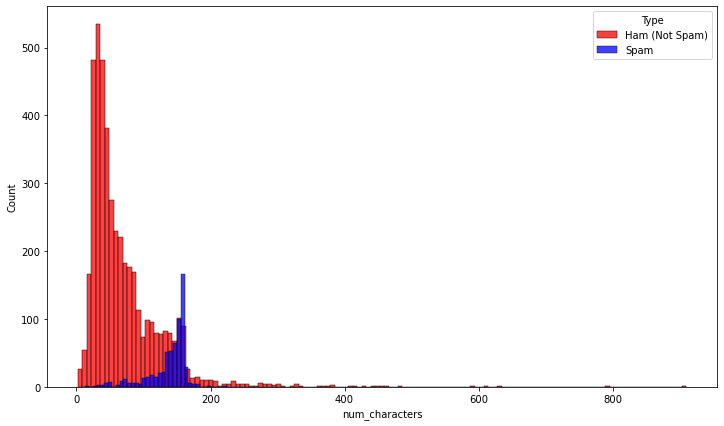

In [34]:
plt.figure(figsize=(12,7))
sns.histplot(ds[ds['type'] == 0]['num_characters'],color='red')
sns.histplot(ds[ds['type'] == 1]['num_characters'],color='blue')
plt.legend(labels=["Ham (Not Spam)","Spam"], title="Type")

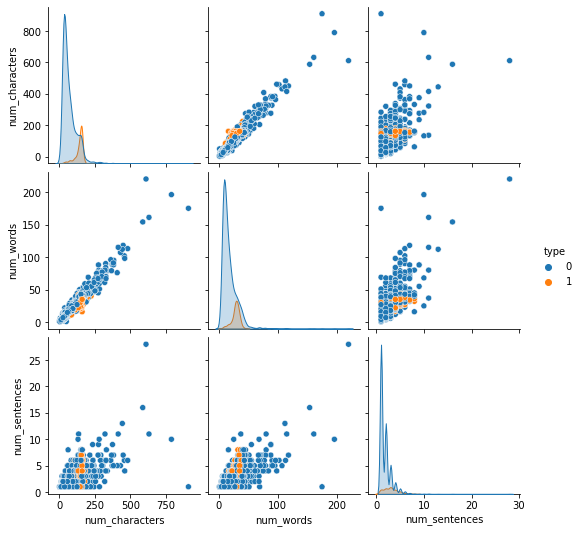

In [35]:
# 0 --> Ham (Not Spam)
# 1 --> Spam
sns.pairplot(ds, hue='type')

In [36]:
ds.corr()

,type,num_characters,num_words,num_sentences
type,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

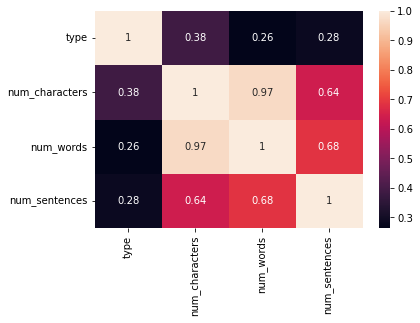

In [37]:
sns.heatmap(ds.corr(), annot=True)

In [38]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\SHREYASH
[nltk_data]     SALUNKE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
ds['text'][1]

'Ok lar... Joking wif u oni...'

In [40]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()
lm = WordNetLemmatizer()


def text_transformation(text):
    y = []
    text = text.split()           # Tokenization
    
    for i in text:
        y.append(ps.stem(i))          # Stemming
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lm.lemmatize(i))           # Lemmitization
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)           # StopWord and Punctation Removal
        
    return y

In [41]:
text_transformation(ds['text'][1])

['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']

In [42]:
ds['transformed_text'] = ds['text'].apply(text_transformation)

In [43]:
ds.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., avail, onli, bug..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joke, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor..., u, c, alreadi, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf,, live, around, though]"


In [44]:
ds['transformed_text'] = ds['transformed_text'].apply(' '.join)

In [45]:
ds.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail onli bugi n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X = vector.fit_transform(ds['transformed_text'])
y = ds['type']

In [47]:
print(X)

  (0, 7801)	0.1860442521504474
  (0, 1059)	0.3365316002063434
  (0, 3435)	0.15759745708021097
  (0, 1986)	0.28386065787785913
  (0, 1703)	0.3211263371364384
  (0, 4266)	0.28386065787785913
  (0, 8007)	0.23492985295696706
  (0, 3475)	0.1878979882654017
  (0, 1705)	0.2947908659721963
  (0, 5256)	0.16887150511079863
  (0, 1286)	0.2654142478784645
  (0, 2246)	0.3017180009822357
  (0, 5624)	0.2530501317380492
  (0, 4150)	0.3365316002063434
  (0, 3390)	0.1354174927198747
  (1, 5254)	0.5559577528789098
  (1, 7917)	0.435347940020484
  (1, 4115)	0.5007583458291837
  (1, 4303)	0.4139683615848099
  (1, 5223)	0.2815216205248931
  (2, 77)	0.23769395096970508
  (2, 1154)	0.18547469329512378
  (2, 5917)	0.16329045141317866
  (2, 7484)	0.12274223516013014
  (2, 6823)	0.20049220119144187
  :	:
  (5165, 8178)	0.3744943755549847
  (5165, 3717)	0.3389520578595408
  (5165, 3390)	0.26879885452114627
  (5166, 6952)	0.4966750911529332
  (5166, 5558)	0.4966750911529332
  (5166, 4862)	0.43507141718049236
  (516

In [48]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5169, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [50]:
len(y_test)

1034

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)
acc_lr = accuracy_score(y_predLR, y_test)*100
print("Accuracy:",acc_lr )

Accuracy: 96.42166344294004


In [53]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       915
           1       0.99      0.70      0.82       119

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.97      0.96      0.96      1034



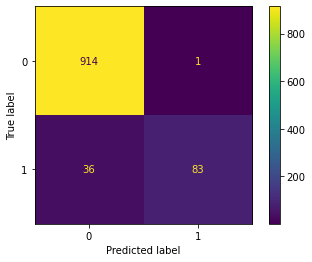

In [54]:
conf_matrix_LR = plot_confusion_matrix(lr, X_test, y_test)

In [55]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_predLSVC = lsvc.predict(X_test)
acc_lsvc =accuracy_score(y_predLSVC, y_test) * 100
print("Accuracy:",acc_lsvc)

Accuracy: 98.8394584139265


In [56]:
print(classification_report(y_test,y_predLSVC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       915
           1       0.99      0.91      0.95       119

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



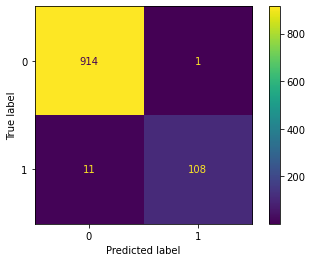

In [57]:
conf_matrix_LSVC = plot_confusion_matrix(lsvc, X_test, y_test)

In [58]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_predBNB = bnb.predict(X_test)
acc_bnb =accuracy_score(y_predBNB, y_test) * 100
print("Accuracy:",acc_bnb)

Accuracy: 98.06576402321083


In [59]:
print(classification_report(y_test,y_predBNB))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       915
           1       0.99      0.84      0.91       119

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



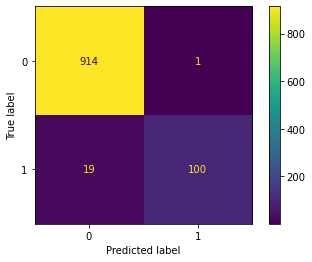

In [60]:
conf_matrix_BNB = plot_confusion_matrix(bnb, X_test, y_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtc.fit(X_train,y_train)
y_predDTC = dtc.predict(X_test)
acc_dtc =accuracy_score(y_predDTC, y_test) * 100
print("Accuracy:",acc_dtc)

Accuracy: 95.84139264990328


In [62]:
print(classification_report(y_test,y_predDTC))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       915
           1       0.86      0.76      0.81       119

    accuracy                           0.96      1034
   macro avg       0.91      0.87      0.89      1034
weighted avg       0.96      0.96      0.96      1034



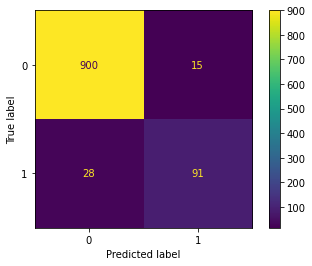

In [63]:
conf_matrix_DTC = plot_confusion_matrix(dtc, X_test, y_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_predKNC = knc.predict(X_test)
acc_knc =accuracy_score(y_predKNC, y_test) * 100
print("Accuracy:",acc_knc)

Accuracy: 90.61895551257253


In [65]:
print(classification_report(y_test,y_predKNC))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       915
           1       1.00      0.18      0.31       119

    accuracy                           0.91      1034
   macro avg       0.95      0.59      0.63      1034
weighted avg       0.92      0.91      0.88      1034



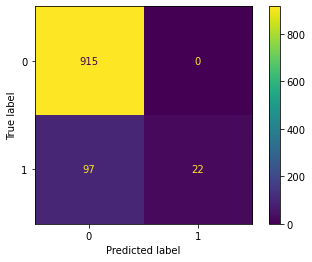

In [66]:
conf_matrix_KNC = plot_confusion_matrix(knc, X_test, y_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_predRFC = rfc.predict(X_test)
acc_rfc =accuracy_score(y_predRFC, y_test) * 100
print("Accuracy:",acc_rfc)

Accuracy: 98.35589941972921


In [68]:
print(classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       915
           1       0.99      0.87      0.92       119

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



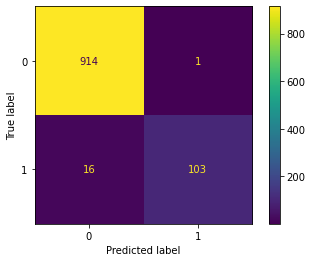

In [69]:
conf_matrix_RFC = plot_confusion_matrix(rfc, X_test, y_test)

In [70]:
performance_df = pd.DataFrame({'Algorithm':['Logistic Regression','Linear SVC', 'Bernoulli NB', 'Decision Tree', 'KNeighbors Classifier', 'Random Forest Classifier'],'Accuracy':[acc_lr, acc_lsvc, acc_bnb, acc_dtc, acc_knc, acc_rfc]}).set_index('Algorithm')

In [71]:
performance_df.sort_values('Accuracy',ascending=False)

,Accuracy
Algorithm,
Linear SVC,98.839458
Random Forest Classifier,98.355899
Bernoulli NB,98.065764
Logistic Regression,96.421663
Decision Tree,95.841393
KNeighbors Classifier,90.618956
